In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data_raw = pd.read_excel("Credit Card Customer Data.xlsx")

# EDA

In [3]:
customer_data_raw.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
customer_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
customer_data_raw.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
customer_data_raw.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [7]:
customer_data_raw.isnull().sum().sort_values(ascending = False)

Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
Customer Key           0
Sl_No                  0
dtype: int64

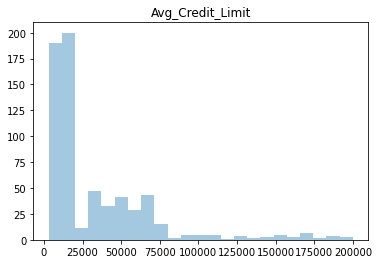

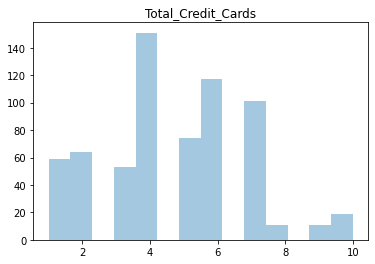

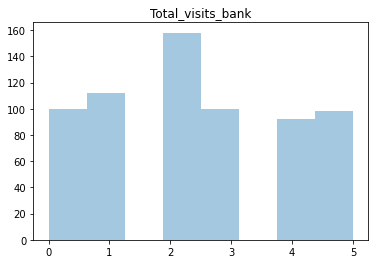

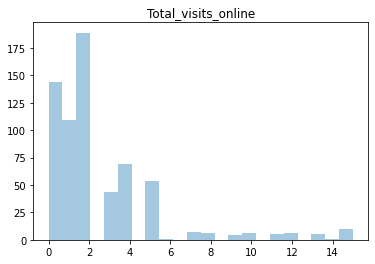

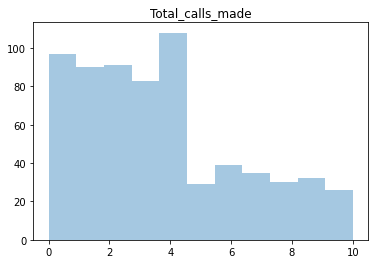

In [8]:
# Removing the ID and the index from the analises (can't be used)

value_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards' , 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
customer_data = pd.DataFrame(customer_data_raw, columns = value_columns)

plt.rcParams["figure.figsize"] = (6,4)

for column in value_columns:
    fig = sns.distplot(customer_data_raw[column], kde=False)
    plt.title(column)
    plt.xlabel('')
    plt.show()

# Quick analises of the data

### By only looking at the graphs, i could tell that we have between 3 and 5 groups, and the dominant group is the 0 to 25.000 limit
### The distribution of credit cards per client has the majority by 4 and the minority 8 and 9 CCs.
### The visit count is almost equal with a visible advantage of 2 visits by period.
### The online visits are almost dominated by the 0 to 2 visits.
### The majoraty or don't call, or made up to 4 calls per period.

### My personal guess, here we may have corporative accounts in question, what would explain limits over 100.000, and would explain some behaviors like many access in the online platform visits to the bank.
### The low count in accesses to the bank (online or presential) can be explained by the customers only paying bills or making expecific transactions.

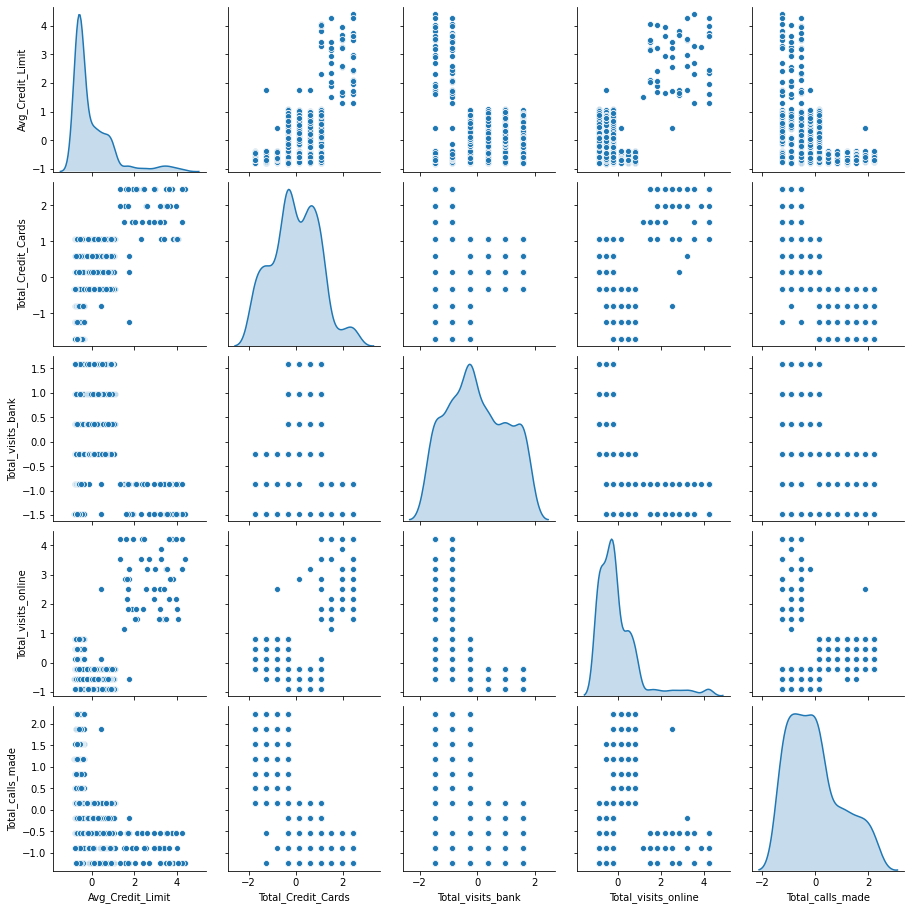

In [9]:
customer_data_attr = customer_data
customer_data_scaled = customer_data_attr.apply(zscore)
sns.pairplot(customer_data_scaled,diag_kind='kde')

Text(0.5, 1.0, 'Elbow Analysis')

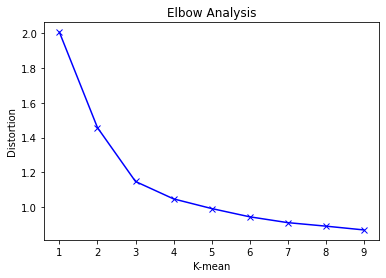

In [10]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(customer_data_scaled)
    prediction=model.predict(customer_data_scaled)
    meanDistortions.append(sum(np.min(cdist(customer_data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / customer_data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('K-mean')
plt.ylabel('Distortion')
plt.title('Elbow Analysis')

In [11]:
# Here as in the exercise I will use a method to try figuring out the best K
final_model=KMeans(3)
final_model.fit(customer_data_scaled)
prediction=final_model.predict(customer_data_scaled)

#Append the prediction 
customer_data["GROUP KMEAN"] = prediction + 1
customer_data_scaled["GROUP KMEAN"] = prediction + 1
customer_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP KMEAN
0,100000,2,1,1,0,2
1,50000,3,0,10,9,1
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,3


In [12]:
customer_data_cluster = customer_data.groupby(['GROUP KMEAN'])
customer_data_cluster.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP KMEAN,,,,,
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,33782.383420,5.515544,3.489637,0.981865,2.000000
3,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A686AE50>,
      dtype=object)

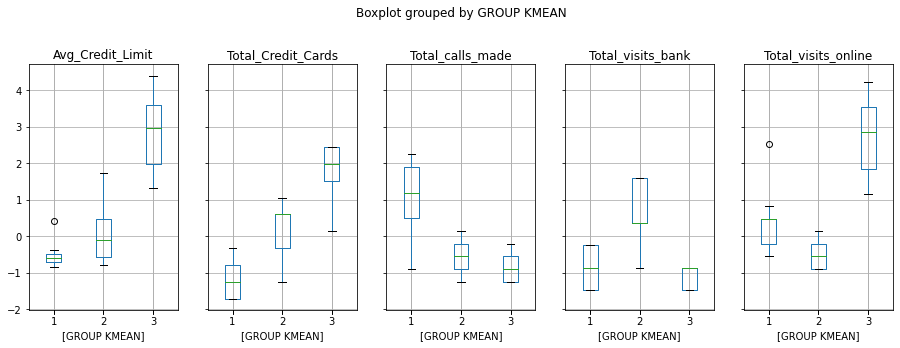

In [13]:
#plt.rcParams["figure.figsize"] = (8,3)
#for column in value_columns:
#    bp = sns.boxplot(x="GROUP KMEAN", y=column, data=customer_data_scaled)
#    plt.title(column)
#    plt.xlabel('')
#    plt.show()
customer_data_scaled.boxplot(by='GROUP KMEAN', layout = (2,5),figsize=(15,10)) #This doesn't work (I dunno why)

# Hierarchial Analysis

In [14]:
Z_ward = linkage(customer_data_scaled, metric='euclidean', method='ward')
c_ward, coph_dists = cophenet(Z_ward , pdist(customer_data_scaled))

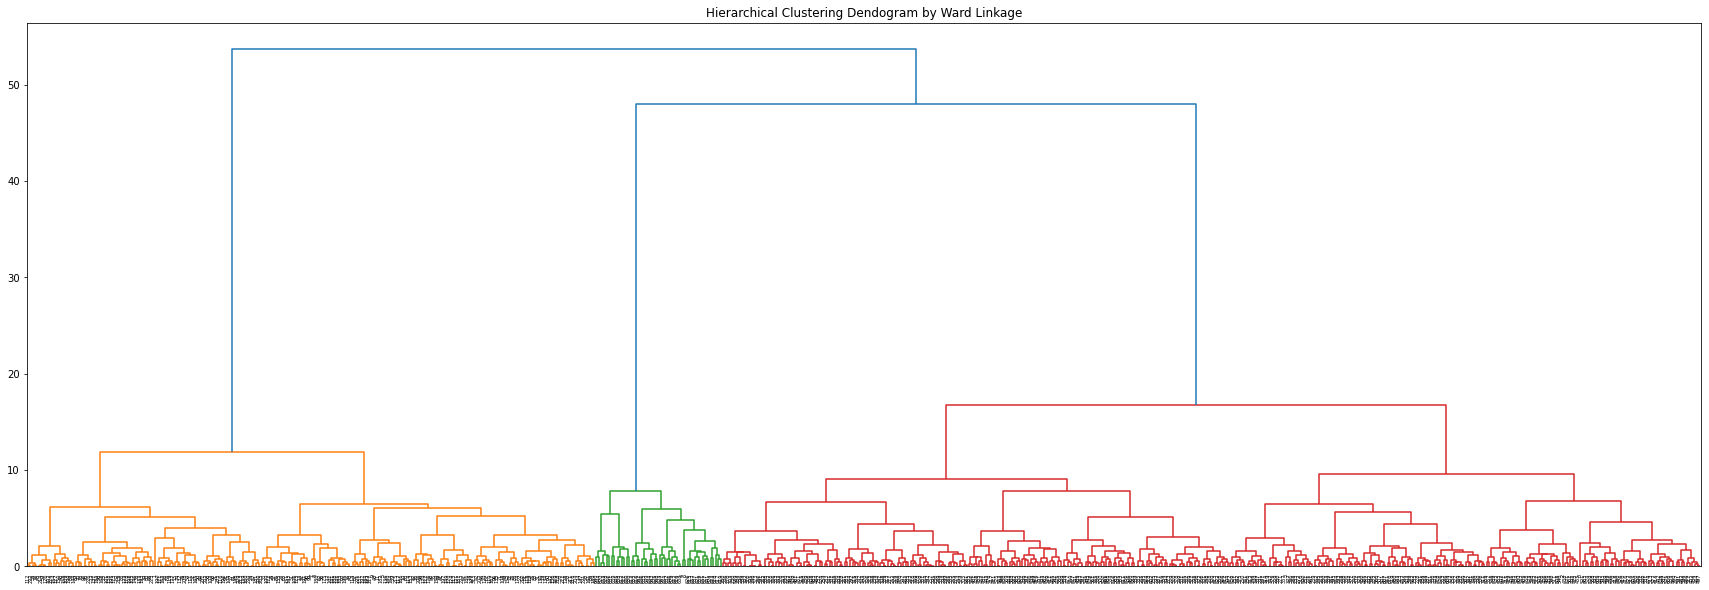

In [15]:
plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendogram by Ward Linkage')
dendrogram(Z_ward)
plt.show()

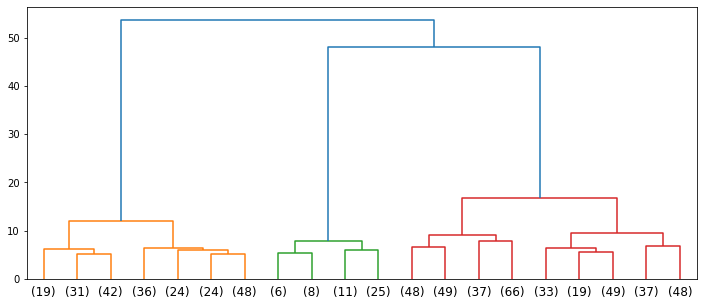

In [16]:
plt.rcParams["figure.figsize"] = (12,5)
dendrogram(
    Z_ward,
    truncate_mode='lastp',
    p=20,
)
plt.show()

In [17]:
#Append the prediction 

clusters_ward = fcluster(Z_ward, criterion='distance', t=35)

print('Cophenetic Coefficient')
print(c_ward)
print('')
print('Silhoette Score')
print(silhouette_score(customer_data_scaled, clusters_ward))

customer_data["GROUP H WARD"] = clusters_ward
customer_data_scaled["GROUP H WARD"] = clusters_ward
customer_data.head()

Cophenetic Coefficient
0.7566252666432097

Silhoette Score
0.5397786437631975


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP KMEAN,GROUP H WARD
0,100000,2,1,1,0,2,3
1,50000,3,0,10,9,1,1
2,50000,7,1,3,4,2,3
3,30000,5,1,1,4,2,3
4,100000,6,0,12,3,3,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A8AD93D0>,
      dtype=object)

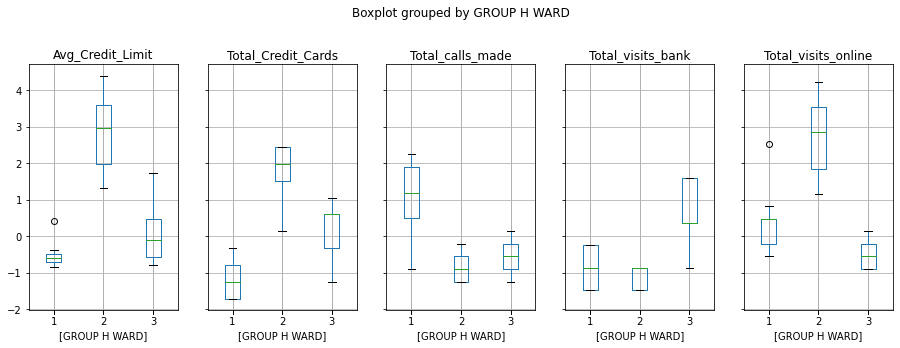

In [18]:
v = value_columns.copy()
v.append('GROUP H WARD')
customer_data_scaled[v].boxplot(by='GROUP H WARD', layout = (2,5),figsize=(15,10))

In [19]:
Z_comp = linkage(customer_data_scaled, metric='euclidean', method='complete')
c_comp, coph_dists = cophenet(Z_comp , pdist(customer_data_scaled))

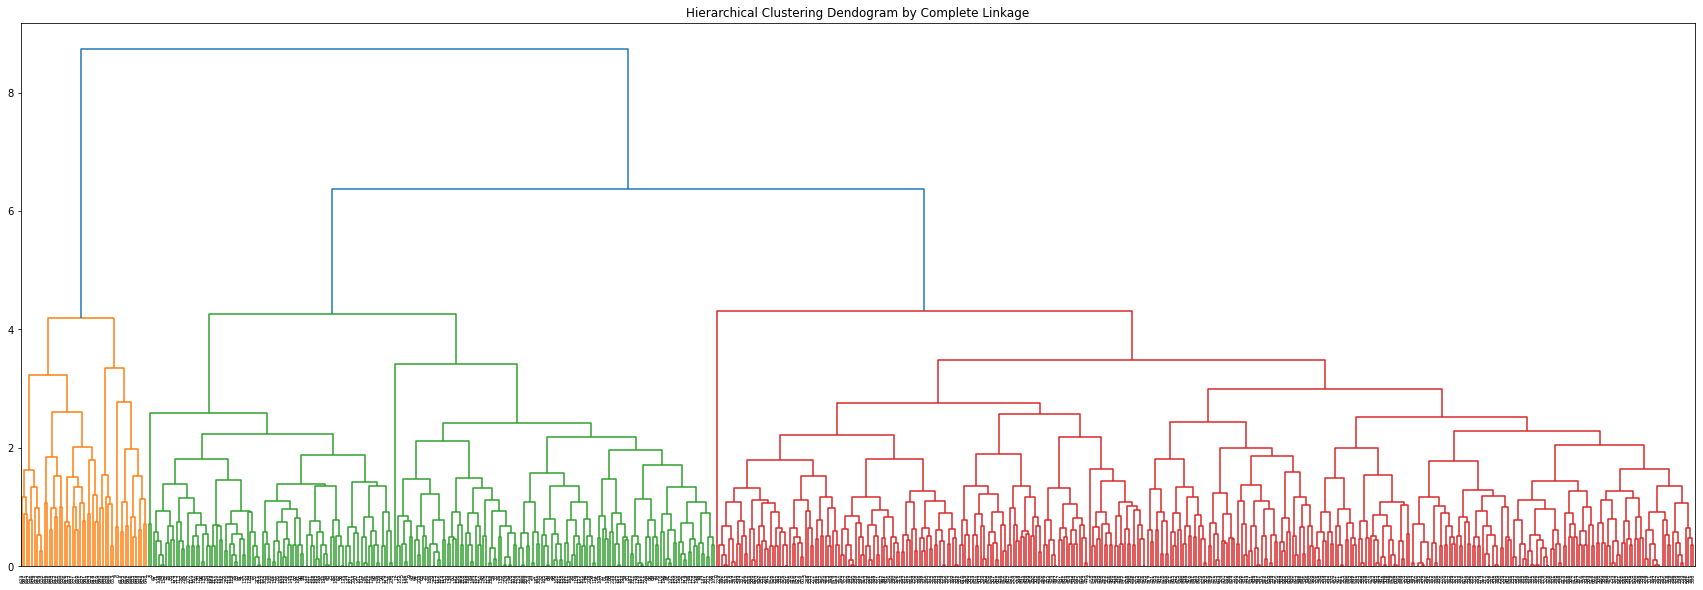

In [20]:
plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendogram by Complete Linkage')
dendrogram(Z_comp)
plt.show()

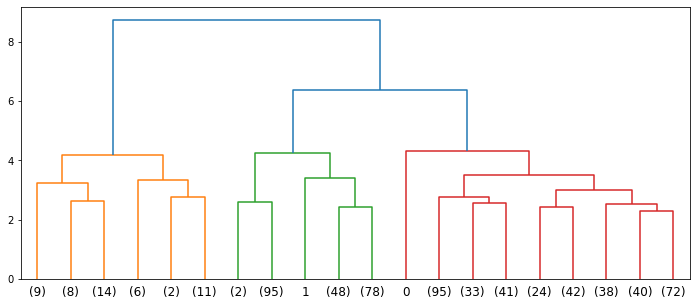

In [21]:
plt.rcParams["figure.figsize"] = (12,5)
dendrogram(
    Z_comp,
    truncate_mode='lastp',
    p=20,
)
plt.show()

In [22]:
#Append the prediction 

clusters_complete = fcluster(Z_comp, criterion='distance', t=5)

print('Cophenetic Coefficient')
print(c_comp)
print('')
print('Silhoette Score')
print(silhouette_score(customer_data_scaled, clusters_complete))

customer_data["GROUP H COMPLETE"] = clusters_complete
customer_data_scaled["GROUP H COMPLETE"] = clusters_complete
customer_data.head()

Cophenetic Coefficient
0.9200216505568093

Silhoette Score
0.6047553572064851


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP KMEAN,GROUP H WARD,GROUP H COMPLETE
0,100000,2,1,1,0,2,3,3
1,50000,3,0,10,9,1,1,2
2,50000,7,1,3,4,2,3,3
3,30000,5,1,1,4,2,3,3
4,100000,6,0,12,3,3,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A88CCCA0>,
      dtype=object)

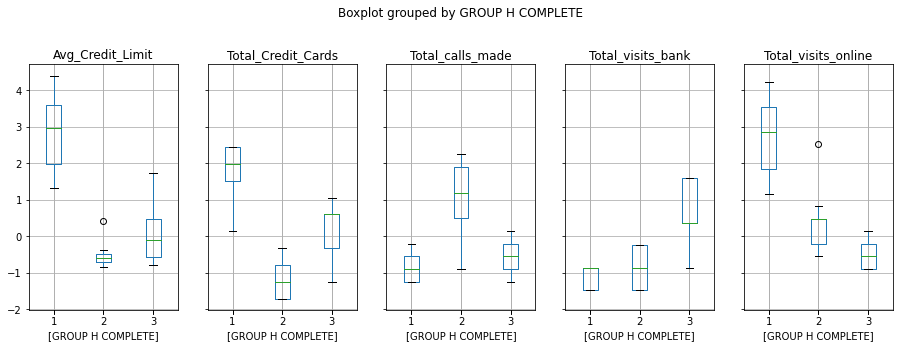

In [23]:
v = value_columns.copy()
v.append('GROUP H COMPLETE')
customer_data_scaled[v].boxplot(by='GROUP H COMPLETE', layout = (2,5),figsize=(15,10))

In [24]:
Z_ave = linkage(customer_data_scaled, metric='euclidean', method='average')
c_ave, coph_dists = cophenet(Z_ave , pdist(customer_data_scaled))

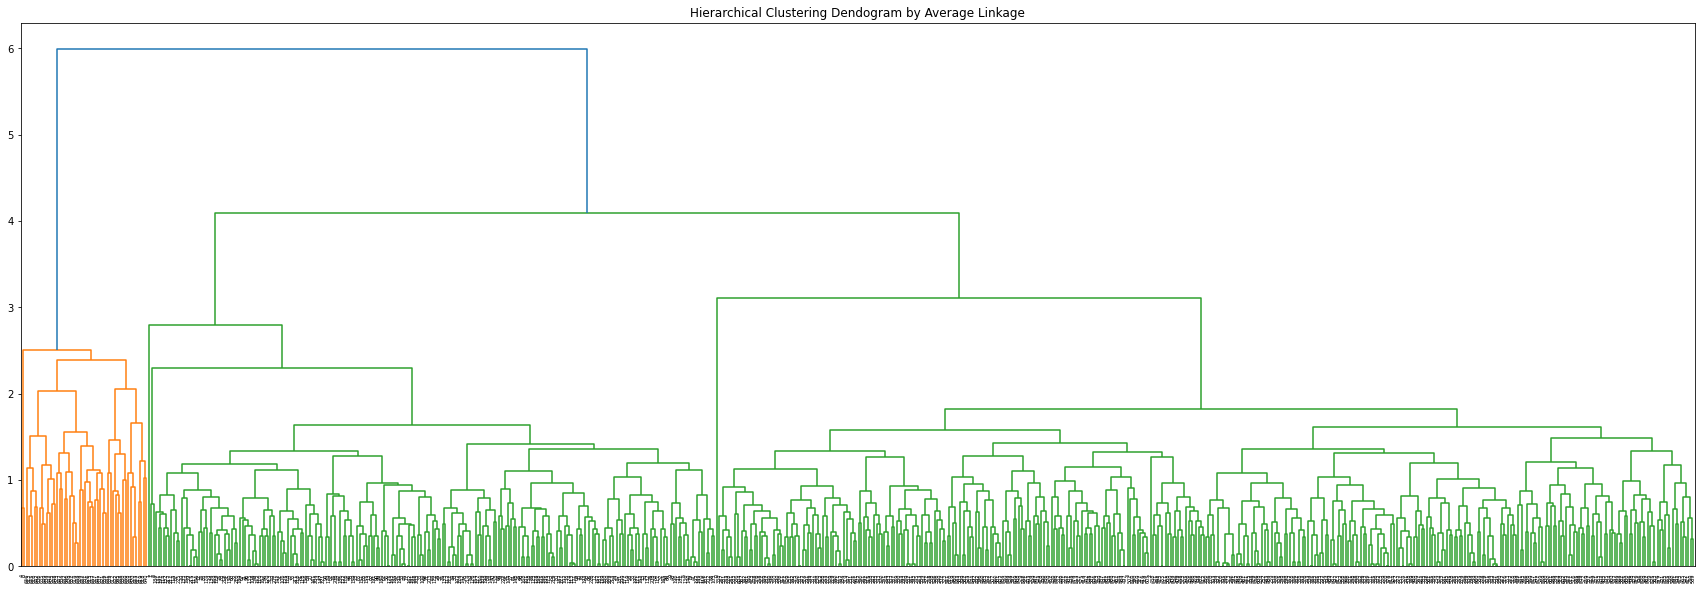

In [25]:
plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendogram by Average Linkage')
dendrogram(Z_ave)
plt.show()

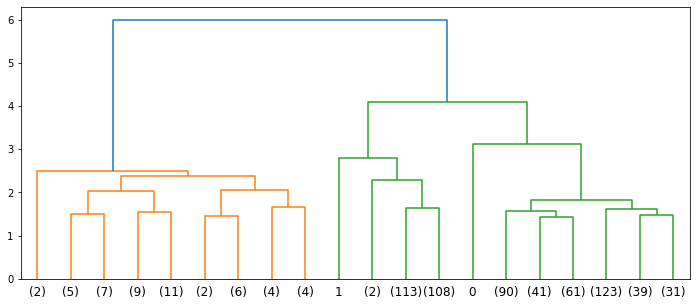

In [26]:
plt.rcParams["figure.figsize"] = (12,5)
dendrogram(
    Z_ave,
    truncate_mode='lastp',
    p=20,
)
plt.show()

In [27]:
#Append the prediction 

clusters_ave = fcluster(Z_ave, criterion='distance', t=3.5)

#Best Cophenetic Coefficient
print('Cophenetic Coefficient')
print(c_ave)
print('')
print('Silhoette Score')
print(silhouette_score(customer_data_scaled, clusters_ave))

customer_data["GROUP H AVERAGE"] = clusters_ave
customer_data_scaled["GROUP H AVERAGE"] = clusters_ave
customer_data.head()

Cophenetic Coefficient
0.9441087842654158

Silhoette Score
0.6184274907190348


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP KMEAN,GROUP H WARD,GROUP H COMPLETE,GROUP H AVERAGE
0,100000,2,1,1,0,2,3,3,3
1,50000,3,0,10,9,1,1,2,2
2,50000,7,1,3,4,2,3,3,3
3,30000,5,1,1,4,2,3,3,3
4,100000,6,0,12,3,3,2,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229A8EC4070>,
      dtype=object)

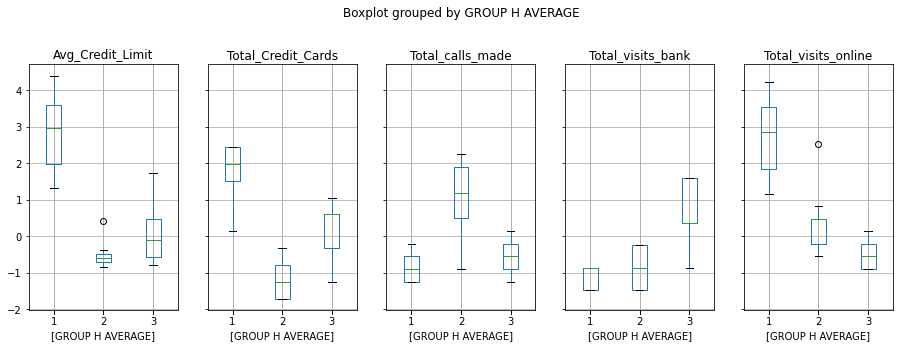

In [28]:
v = value_columns.copy()
v.append('GROUP H AVERAGE')
customer_data_scaled[v].boxplot(by='GROUP H AVERAGE', layout = (2,5),figsize=(15,10))

In [29]:
customer_data_cluster_kmean = customer_data.groupby(['GROUP KMEAN'])
customer_data_cluster_ward = customer_data.groupby(['GROUP H WARD'])
customer_data_cluster_comp = customer_data.groupby(['GROUP H COMPLETE'])
customer_data_cluster_ave = customer_data.groupby(['GROUP H AVERAGE'])

In [30]:
customer_data_cluster_kmean[value_columns].mean().sort_values(["Avg_Credit_Limit"], ascending=False)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP KMEAN,,,,,
3,141040.000000,8.740000,0.600000,10.900000,1.080000
2,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536


In [31]:
customer_data_cluster_ward[value_columns].mean().sort_values(["Avg_Credit_Limit"], ascending=False)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP H WARD,,,,,
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536


In [32]:
customer_data_cluster_comp[value_columns].mean().sort_values(["Avg_Credit_Limit"], ascending=False)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP H COMPLETE,,,,,
1,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33782.383420,5.515544,3.489637,0.981865,2.000000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


In [33]:
customer_data_cluster_ave[value_columns].mean().sort_values(["Avg_Credit_Limit"], ascending=False)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP H AVERAGE,,,,,
1,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33782.383420,5.515544,3.489637,0.981865,2.000000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


### Comparison

#### I dunno if this is supposed to happen, but all the clusters have the same mean, I tried 4 and only the ward was different from the others, I was about to give an aswer of 4 clusters, but I saw that the 2* and 3* clusters had almost the same behavier, then I tried change all to have 3 clusters and see the results.

### 1. How many different segments of customers are there?
#### I would say 3 groups explains around 95% of the customers

### 2. How are these segments different from each other?
#### Group 1 is composed by customers with many credit cards, what increases their limits, I think mite be a need for them. They almost don't go to the bank and try to do all the work online. Rarely they make calls to bank, probably only for problems or promotions.
#### Group 2 is composed by customers with an average number of cards, between 5 and 6, their limit is good, they go sometimes to the bank and make calls because they don't use the online services provided by the bank.
#### Group 3 is composed by customers with lower limits, that don't have many cards, they go sporadically to the bank to do some thansactions that I guess can't be done online or by phone, because they do often use online services and do many calls.

### 3. What are your recommendations to the bank on how to better market to and service these customers?
#### For the first group, I would say that if you offer a credit card with high limit and with all services available online, it would be effective. The way to do the market is only online to, because their pattern of access to the bank.
#### For the second group, I would say to improve and maintain a good customer experience in the bank, and by phone. Maybe try to undestand why this group don't use online services, maybe it's not easy for them. I would guess they are old or "simplier" people that don't use eletronics often.
#### For the last group, I would offer better taxes to estimulate their usage of the credit card, maybe making them have interest in more limits and usage of the bank's services. The main channel to interact with then will be by phone.